In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#Data

In [7]:
df = pd.read_csv('Hamspam.csv', encoding='latin-1')
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [8]:
df['label'] = df['type'].map({'ham':0,'spam':1})
df

,type,text,label
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0
5555,ham,"Awesome, I remember the last time we got someb...",0
5556,spam,"If you don't, your prize will go to another cu...",1
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1


In [4]:
#Length

In [9]:
df['length'] = df['text'].apply(len)
df

,type,text,label,length
0,ham,Hope you are having a good week. Just checking in,0,49
1,ham,K..give back my thanks.,0,23
2,ham,Am also doing in cbe only. But have to pay.,0,43
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1,150
4,spam,okmail: Dear Dave this is your final notice to...,1,161
...,...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0,245
5555,ham,"Awesome, I remember the last time we got someb...",0,88
5556,spam,"If you don't, your prize will go to another cu...",1,145
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1,154


In [5]:
#Ham and Spam data

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

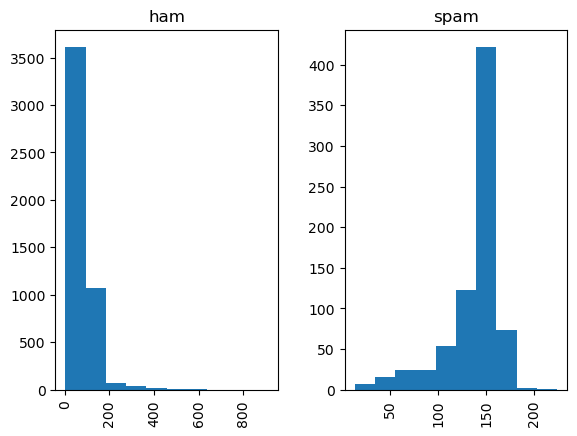

In [10]:
df.hist(column='length', by='type')

In [11]:
ham = df[df['type']=='ham']
spam = df[df['type']=='spam']

In [12]:
ham

,type,text,label,length
0,ham,Hope you are having a good week. Just checking in,0,49
1,ham,K..give back my thanks.,0,23
2,ham,Am also doing in cbe only. But have to pay.,0,43
5,ham,Aiya we discuss later lar... Pick u up at 4 is...,0,50
6,ham,Are you this much buzy,0,22
...,...,...,...,...
5552,ham,Already one guy loving you:-.,0,29
5553,ham,Prepare to be pounded every night...,0,36
5554,ham,You are a great role model. You are giving so ...,0,245
5555,ham,"Awesome, I remember the last time we got someb...",0,88


In [13]:
spam

,type,text,label,length
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1,150
4,spam,okmail: Dear Dave this is your final notice to...,1,161
8,spam,Marvel Mobile Play the official Ultimate Spide...,1,161
19,spam,U can WIN å£100 of Music Gift Vouchers every w...,1,158
34,spam,U have won a nokia 6230 plus a free digital ca...,1,158
...,...,...,...,...
5532,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,1,137
5538,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,1,122
5551,spam,Ur balance is now å£500. Ur next question is: ...,1,126
5556,spam,"If you don't, your prize will go to another cu...",1,145


In [6]:
#Worldcloud function

In [14]:
def worldcloud(data, label):
    txt = ' '.join(data['text'])
    
    wc = WordCloud(background_color='white',stopwords=STOPWORDS).generate(txt)
    plt.imshow(wc)
    plt.title(label)
    plt.axis('off')

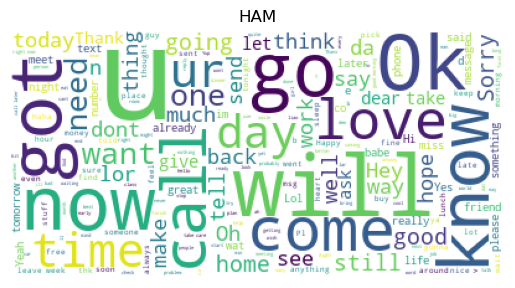

In [16]:
worldcloud(ham,'HAM')

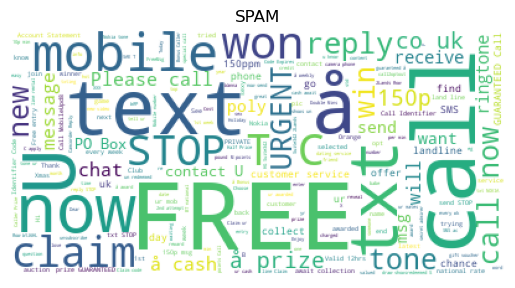

In [17]:
worldcloud(spam, 'SPAM')

# Text cleaning
1. Remove unwanted characters
2. Text normalization
3. Tokenization
4. lemmatization
5. Join the text

In [18]:
df

,type,text,label,length
0,ham,Hope you are having a good week. Just checking in,0,49
1,ham,K..give back my thanks.,0,23
2,ham,Am also doing in cbe only. But have to pay.,0,43
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",1,150
4,spam,okmail: Dear Dave this is your final notice to...,1,161
...,...,...,...,...
5554,ham,You are a great role model. You are giving so ...,0,245
5555,ham,"Awesome, I remember the last time we got someb...",0,88
5556,spam,"If you don't, your prize will go to another cu...",1,145
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",1,154


In [23]:
lemma = WordNetLemmatizer()

In [26]:
corpus = []

for i in range(len(df)):
    txt = re.sub('[^a-zA-Z]',' ',df['text'][i])
    txt = txt.lower()
    txt = word_tokenize(txt)
    txt = [lemma.lemmatize(i) for i in txt if i not in stopwords.words('english')]
    txt = ' '.join(txt)
    corpus.append(txt)

In [27]:
corpus

['hope good week checking',
 'k give back thanks',
 'also cbe pay',
 'complimentary star ibiza holiday cash need urgent collection landline lose box sk wp ppm',
 'okmail dear dave final notice collect tenerife holiday cash award call landline tc sae box cw wx ppm',
 'aiya discus later lar pick u',
 'much buzy',
 'please ask mummy call father',
 'marvel mobile play official ultimate spider man game ur mobile right text spider game send u free ball wallpaper',
 'fyi usf swing room whenever',
 'sure thing big man hockey election go longer hour though',
 'anything lor',
 'march ending ready call sure problem capital never complete far work lady',
 'hmm well night night',
 'k sure get noon see',
 'ha ha cool cool chikku chikku db',
 'darren saying dat u meeting da ge den dun meet dinner co later u leave xy feel awkward den u meet lunch lor',
 'dint tell anything angry told abi',
 'u u wan come come lor din c stripe skirt',
 'u win music gift voucher every week starting txt word draw tscs ww

In [28]:
len(corpus)

5559

# Feature Extraction

In [29]:
cv = CountVectorizer()

In [34]:
x = cv.fit_transform(corpus)
x = x.toarray()

In [33]:
cv.vocabulary_

{'hope': 2772,
 'good': 2465,
 'week': 6732,
 'checking': 1010,
 'give': 2428,
 'back': 465,
 'thanks': 6110,
 'also': 184,
 'cbe': 947,
 'pay': 4395,
 'complimentary': 1198,
 'star': 5751,
 'ibiza': 2858,
 'holiday': 2749,
 'cash': 929,
 'need': 3998,
 'urgent': 6503,
 'collection': 1155,
 'landline': 3297,
 'lose': 3492,
 'box': 728,
 'sk': 5496,
 'wp': 6902,
 'ppm': 4626,
 'okmail': 4200,
 'dear': 1456,
 'dave': 1443,
 'final': 2131,
 'notice': 4109,
 'collect': 1152,
 'tenerife': 6073,
 'award': 442,
 'call': 867,
 'tc': 6036,
 'sae': 5171,
 'cw': 1403,
 'wx': 6936,
 'aiya': 142,
 'discus': 1621,
 'later': 3321,
 'lar': 3308,
 'pick': 4481,
 'much': 3903,
 'buzy': 850,
 'please': 4528,
 'ask': 363,
 'mummy': 3916,
 'father': 2069,
 'marvel': 3648,
 'mobile': 3818,
 'play': 4520,
 'official': 4179,
 'ultimate': 6420,
 'spider': 5683,
 'man': 3610,
 'game': 2351,
 'ur': 6499,
 'right': 5083,
 'text': 6093,
 'send': 5312,
 'free': 2272,
 'ball': 480,
 'wallpaper': 6665,
 'fyi': 2340,


In [36]:
y = df['label']
y

0       0
1       0
2       0
3       1
4       1
       ..
5554    0
5555    0
5556    1
5557    1
5558    0
Name: label, Length: 5559, dtype: int64

# Model Building

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=0)

In [38]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1464
           1       0.86      0.96      0.90       204

    accuracy                           0.97      1668
   macro avg       0.92      0.97      0.94      1668
weighted avg       0.98      0.97      0.98      1668



In [42]:
print('Training Accuarcy: ', nb.score(xtrain,ytrain))
print('Test Accuracy: ',nb.score(xtest,ytest))

Training Accuarcy:  0.9899768696993061
Test Accuracy:  0.9748201438848921
